# Fourier Analysis of Reservoir Computer Node States

In [84]:
%run "../HyperParameterOpt/GenerateExperiments/res_experiment.py"
import copy
from matplotlib import pyplot as plt
import scipy as sp
DIFF_EQ_PARAMS = {
                  "x0": [-20, 10, -.5],
                  "begin": 0,
                  "end": 85,
                  "timesteps": 85000,
                  "train_per": .889,
                  "solver": lorenz_equ,
                  "clip": 40
                 }

RES_PARAMS = {
              "uniform_weights": True,
              "solver": "ridge",
              "ridge_alpha": 1e-6,
              "signal_dim": 3,
              "network": "random graph",

              "res_sz": 2500,
              "activ_f": np.tanh,
              "connect_p": .1,
              "spect_rad": 5,
              "gamma": 5,
              "sigma": .14,
              "sparse_res": True,
             }

TOL = 5
plt.rcParams["figure.figsize"] = [10, 5]

In [52]:
def adj_matrix(topology, topo_params, n, remove_p=0):
    adj = generate_adj(topology, topo_params, n)
    adj = remove_edges(adj, floor(remove_p*np.sum(adj != 0)))
    return adj

def mean_driven_state(A):
    DIFF_EQ_PARAMS["x0"] = random_lorenz_x0()
    train_t, test_t, u = rc_solve_ode(DIFF_EQ_PARAMS)
    rc = ResComp(A, **RES_PARAMS)
    states = rc.drive(train_t, u)
    mean_node_state = np.mean(states, axis=1)
    return mean_node_state

def node_fft(node_state):
    N = len(node_state)
    nodef = np.abs(sp.fft.fft(node_state))
    freq = np.arange(N)/40
    # The frequencies are symmetric. We take half and multiply by 2
    nodef = 2*nodef[:N//2] 
    freq = freq[:N//2]
    return freq, nodef

## Mean Reservoir Computer Node State (Random DiGraph)

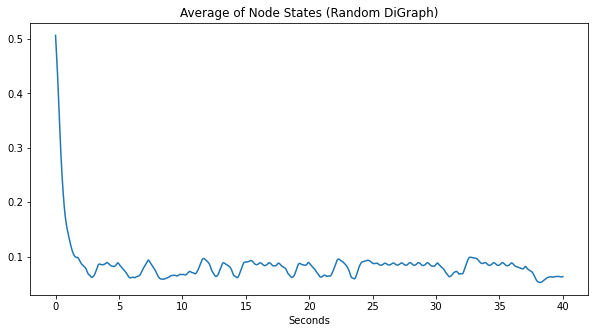

In [210]:
A = adj_matrix("random_digraph", 2, 2500, remove_p=0.7)
rd_node_state = mean_driven_state(A)
t = np.arange(len(rd_node_state)) / 1000.0
plt.plot(t, rd_node_state)
plt.title("Average of Node States (Random DiGraph)")
plt.xlabel("Seconds")
plt.show()

## Mean Reservoir Computer Node State (Zero Matrix)

/Users/djpassey/Code/ReservoirSpecialization/rescomp/ResComp.py:166: UserWarning: Spectral radius of reservoir is close to zero. Edge weights will not be scaled
  warn("Spectral radius of reservoir is close to zero. Edge weights will not be scaled")


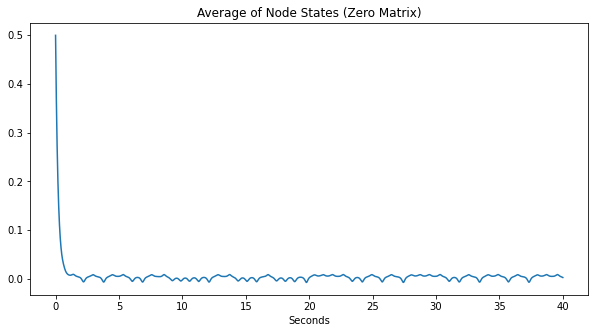

In [211]:
A = np.zeros((2500, 2500))
zero_node_state = mean_driven_state(A)
t = np.arange(len(zero_node_state)) / 1000.0
plt.plot(t, zero_node_state)
plt.xlabel("Seconds")
plt.title("Average of Node States (Zero Matrix)")
plt.show()

## Fourier Transform of Mean Node States

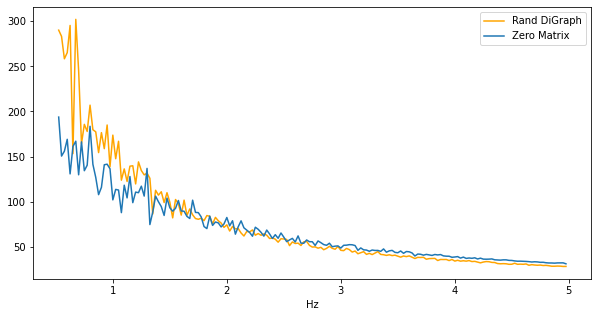

In [212]:
f, rd_f = node_fft(rd_node_state)
f, zero_f = node_fft(zero_node_state)
fmask = (f < 5.0) & (f > .5)
plt.plot(f[fmask], rd_f[fmask], c="orange", label="Rand DiGraph")
plt.plot(f[fmask], zero_f[fmask], label="Zero Matrix")
plt.xlabel("Hz")
plt.legend()
plt.show()

# Fourier Transform of Every Node State

## (1) Zero Matrix

In [178]:
A = np.zeros((2500, 2500))
DIFF_EQ_PARAMS["x0"] = random_lorenz_x0()
train_t, test_t, u = rc_solve_ode(DIFF_EQ_PARAMS)
rc = ResComp(A, **RES_PARAMS)
states = rc.drive(train_t, u)

/Users/djpassey/Code/ReservoirSpecialization/rescomp/ResComp.py:166: UserWarning: Spectral radius of reservoir is close to zero. Edge weights will not be scaled
  warn("Spectral radius of reservoir is close to zero. Edge weights will not be scaled")


In [179]:
every_fft = sp.fft.fft(states.T)

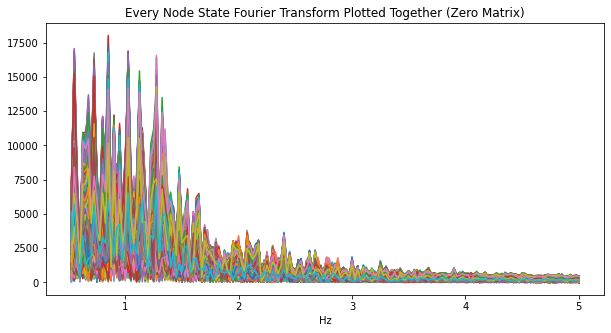

In [187]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(N//2)/40.005
mask = (f > .5) & (f < 5)

plt.title("Every Node State Fourier Transform Plotted Together (Zero Matrix)")
plt.plot(np.array([f[mask] for i in range(2500)]).T, every_fft[:, mask].T)
plt.xlabel("Hz")
plt.show()

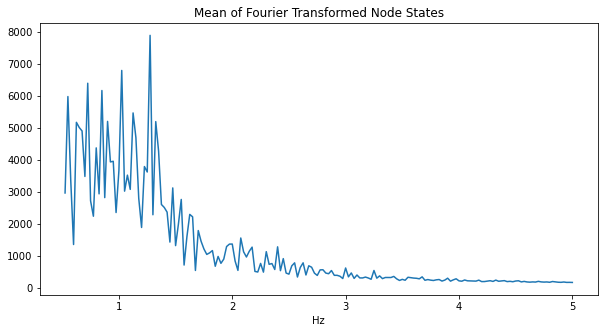

In [188]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Fourier Transformed Node States (Zero Matrix)")
plt.xlabel("Hz")
plt.show()

# (2) Random DiGraph

In [189]:
A = adj_matrix("random_digraph", 2, 2500, remove_p=0.7)
DIFF_EQ_PARAMS["x0"] = random_lorenz_x0()
train_t, test_t, u = rc_solve_ode(DIFF_EQ_PARAMS)
rc = ResComp(A, **RES_PARAMS)
states = rc.drive(train_t, u)

In [190]:
every_fft = sp.fft.fft(states.T)

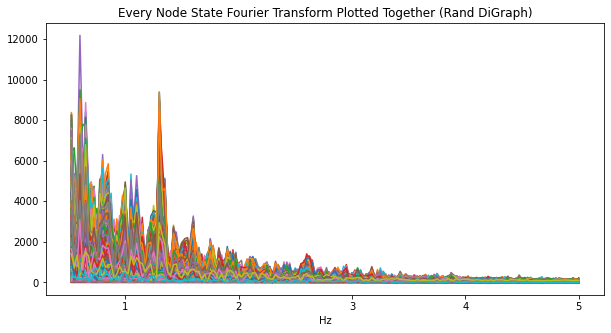

In [191]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(N//2)/40.005
mask = (f > .5) & (f < 5)

plt.title("Every Node State Fourier Transform Plotted Together (Rand DiGraph)")
plt.plot(np.array([f[mask] for i in range(2500)]).T, every_fft[:, mask].T)
plt.xlabel("Hz")
plt.show()

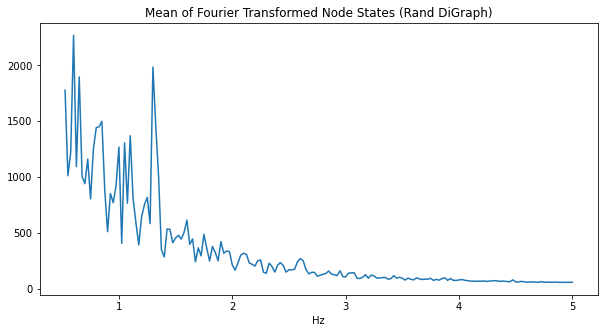

In [193]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Fourier Transformed Node States (Rand DiGraph)")
plt.xlabel("Hz")
plt.show()

# (3) Fourier Analysis of Lorenz System

In [194]:
DIFF_EQ_PARAMS["x0"] = random_lorenz_x0()
train_t, test_t, u = rc_solve_ode(DIFF_EQ_PARAMS)
states = u(train_t).T

In [195]:
every_fft = sp.fft.fft(states.T)

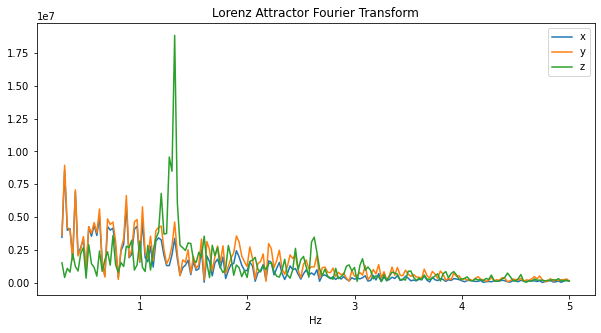

In [202]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(N//2)/40.005
mask = (f > .25) & (f < 5)

plt.title("Lorenz Attractor Fourier Transform")
plt.plot(f[mask], every_fft[0, mask].T, label="x")
plt.plot(f[mask], every_fft[1, mask].T, label="y")
plt.plot(f[mask], every_fft[2, mask].T, label="z")
plt.xlabel("Hz")
plt.legend()
plt.show()

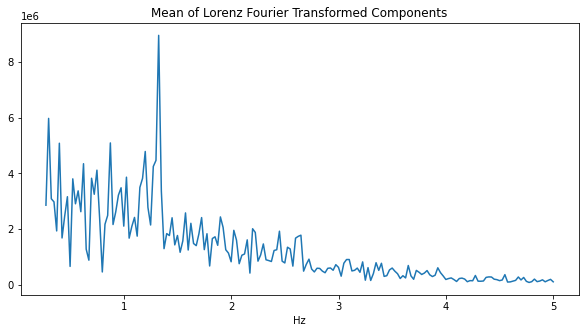

In [203]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Lorenz Fourier Transformed Components")
plt.xlabel("Hz")
plt.show()

## (4) Undriven Reservoir Computer States

In [240]:
rc = ResComp(np.zeros((2500, 2500)), **RES_PARAMS)

def zeros(x):
    if type(x) is float:
        return np.zeros(3)
        #return np.random.randn(3)
    else:
        return np.zeros(3, len(x))
        #return np.random.randn((3, len(x)))

t = np.linspace(0, 40, 40000)
states = rc.drive(t, zeros)

/Users/djpassey/Code/ReservoirSpecialization/rescomp/ResComp.py:166: UserWarning: Spectral radius of reservoir is close to zero. Edge weights will not be scaled
  warn("Spectral radius of reservoir is close to zero. Edge weights will not be scaled")


In [241]:
every_fft = sp.fft.fft(states.T)

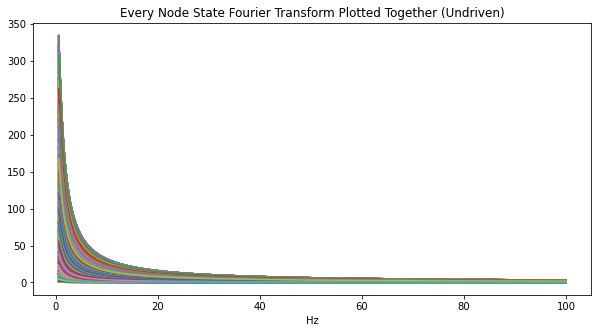

In [242]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(N//2)/40.005
mask = (f > .5) & (f < 100)

plt.title("Every Node State Fourier Transform Plotted Together (Undriven)")
plt.plot(np.array([f[mask] for i in range(2500)]).T, every_fft[:, mask].T)
plt.xlabel("Hz")
plt.show()

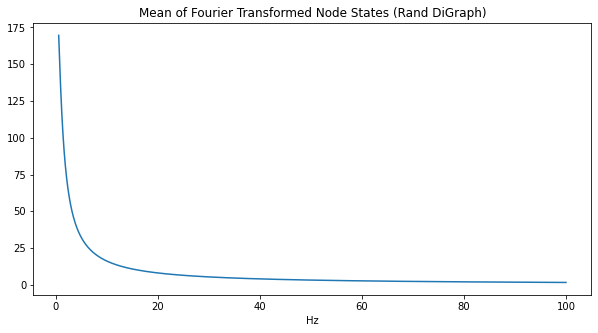

In [243]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Fourier Transformed Node States (Rand DiGraph)")
plt.xlabel("Hz")
plt.show()

## (5) Stimulate RC with Random Noise

In [220]:
rc = ResComp(np.zeros((2500, 2500)), **RES_PARAMS)

def noise(x):
    if type(x) is float:
        return np.random.randn(3)
    else:
        return np.random.randn((3, len(x)))

t = np.linspace(0, 5, 5000)
states = rc.drive(t, noise)

/Users/djpassey/Code/ReservoirSpecialization/rescomp/ResComp.py:166: UserWarning: Spectral radius of reservoir is close to zero. Edge weights will not be scaled
  warn("Spectral radius of reservoir is close to zero. Edge weights will not be scaled")
/usr/local/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [221]:
every_fft = sp.fft.fft(states.T)

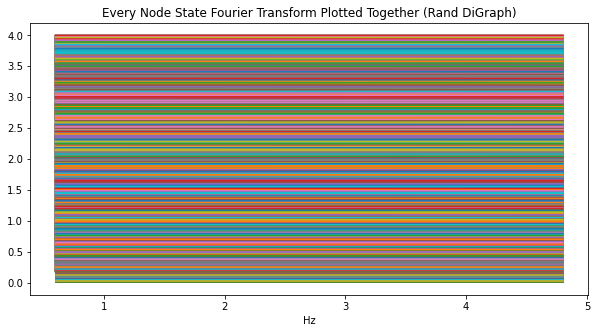

In [222]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(N//2)/5
mask = (f > .5) & (f < 5)

plt.title("Every Node State Fourier Transform Plotted Together (Rand DiGraph)")
plt.plot(np.array([f[mask] for i in range(2500)]).T, every_fft[:, mask].T)
plt.xlabel("Hz")
plt.show()

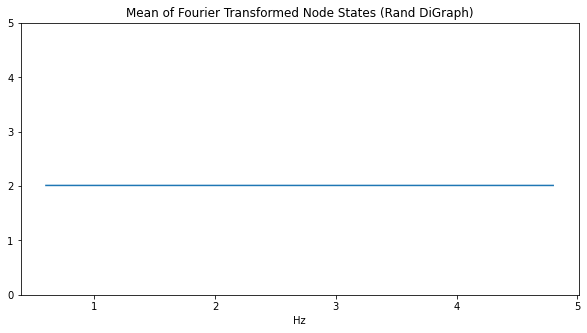

In [224]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Fourier Transformed Node States (Noise)")
plt.xlabel("Hz")
plt.ylim(0,5)
plt.show()

We get a constant spectrum, which is what we expect from white noise!

## (6) Stimulate with large amplitude Sine waves (Zero Matrix)

In [250]:
rc = ResComp(np.zeros((2500, 2500)), **RES_PARAMS)

def big_oscilation(x):
    return  np.array([500*np.sin(2*np.pi*x), 1000*np.sin(2*np.pi*2*x), 750*np.sin(2*np.pi*3*x)])

maxt = 40
tsteps = maxt*1000
t = np.linspace(0, maxt, tsteps)
states = rc.drive(t, big_oscilation)

/Users/djpassey/Code/ReservoirSpecialization/rescomp/ResComp.py:166: UserWarning: Spectral radius of reservoir is close to zero. Edge weights will not be scaled
  warn("Spectral radius of reservoir is close to zero. Edge weights will not be scaled")


#### FFT of input signal

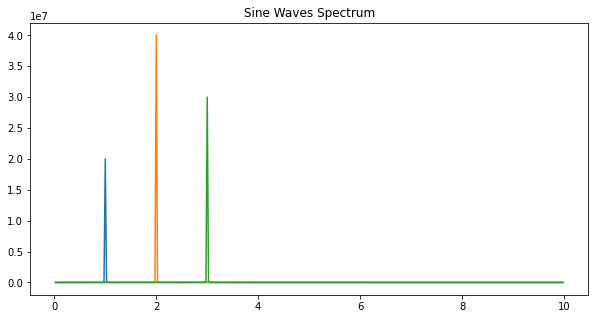

In [276]:
x = big_oscilation(t)
xf = sp.fft.fft(x)
xf = 2*np.abs(xf[:, :tsteps//2])
f = np.arange(tsteps//2)/maxt
mask = (f > 0) & (f < 10)

plt.plot(f[mask], xf[:, mask].T)
plt.title("Sine Waves Spectrum")
plt.show()

In [251]:
every_fft = sp.fft.fft(states.T)

#### Reservoir Computer State Spectrum

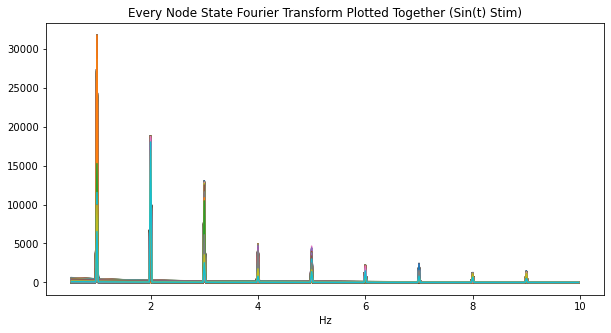

In [252]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(tsteps//2)/maxt
mask = (f > .5) & (f < 10)

plt.title("Every Node State Fourier Transform Plotted Together (Zero)")
plt.plot(np.array([f[mask] for i in range(2500)]).T, every_fft[:, mask].T)
plt.xlabel("Hz")
plt.show()

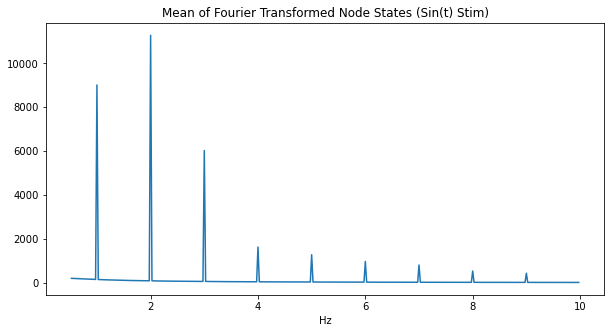

In [253]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Fourier Transformed Node States (Zero)")
plt.xlabel("Hz")
plt.show()

What is interesting here is that out input signal consists of the first three spikes, but the reservoir computer produces small peaks for every integer frequency. Strange! It is like there is some kind of resonance happening inside the computer.

## (6) Stimulate with large amplitude Sine waves (Random Geometric Mean Degree 4)

In [269]:
A = adj_matrix("geom", 4, 2500, remove_p=0.0)
rc = ResComp(A, **RES_PARAMS)

def big_oscilation(x):
    return  np.array([500*np.sin(2*np.pi*x), 1000*np.sin(2*np.pi*2*x), 750*np.sin(2*np.pi*3*x)])

maxt = 40
tsteps = maxt*1000
t = np.linspace(0, maxt, tsteps)
states = rc.drive(t, big_oscilation)

In [270]:
every_fft = sp.fft.fft(states.T)

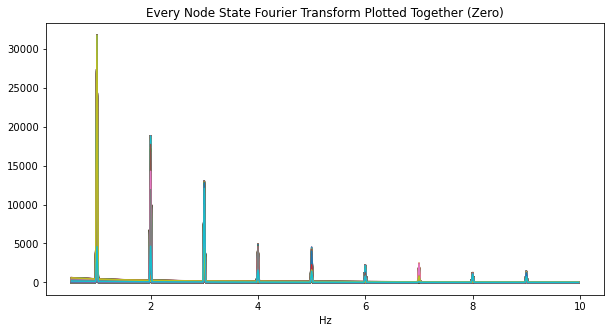

In [271]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(tsteps//2)/maxt
mask = (f > .5) & (f < 10)

plt.title("Every Node State Fourier Transform Plotted Together (Zero)")
plt.plot(np.array([f[mask] for i in range(2500)]).T, every_fft[:, mask].T)
plt.xlabel("Hz")
plt.show()

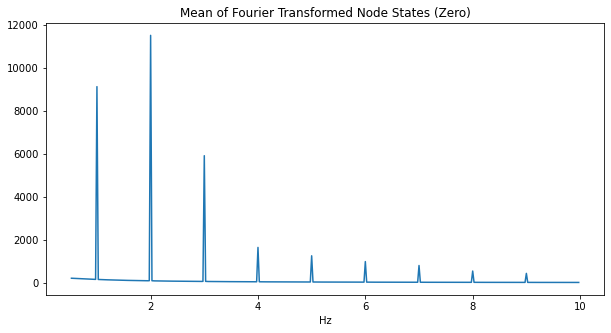

In [272]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Fourier Transformed Node States (Zero)")
plt.xlabel("Hz")
plt.show()

I used a highly connected graph with lots of clustering and we still get the resonance that we saw with the zero matrix

## (6) Stimulate with large amplitude Sine waves (Identity)

In [277]:

rc = ResComp(np.eye(2500), **RES_PARAMS)

def big_oscilation(x):
    return  np.array([500*np.sin(2*np.pi*x), 1000*np.sin(2*np.pi*2*x), 750*np.sin(2*np.pi*3*x)])

maxt = 40
tsteps = maxt*1000
t = np.linspace(0, maxt, tsteps)
states = rc.drive(t, big_oscilation)

In [278]:
every_fft = sp.fft.fft(states.T)

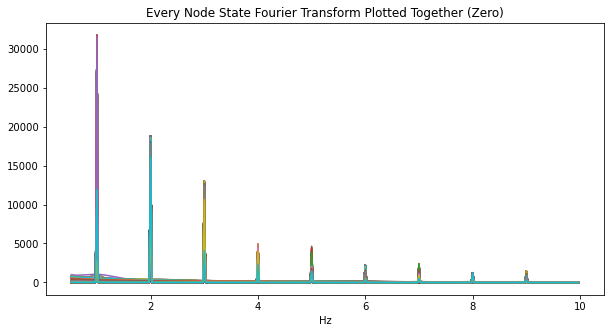

In [279]:
N = every_fft.shape[1]
every_fft = 2 * np.abs(every_fft[:, :N//2])
f = np.arange(tsteps//2)/maxt
mask = (f > .5) & (f < 10)

plt.title("Every Node State Fourier Transform Plotted Together (Zero)")
plt.plot(np.array([f[mask] for i in range(2500)]).T, every_fft[:, mask].T)
plt.xlabel("Hz")
plt.show()

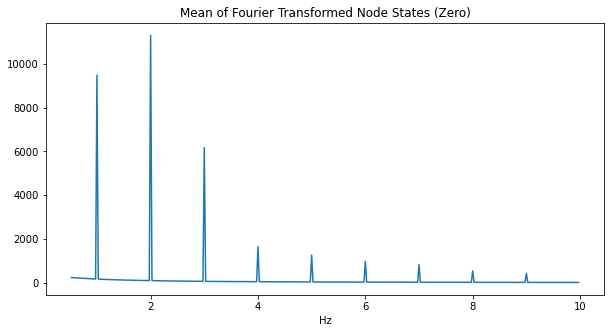

In [280]:
meanfft = np.mean(every_fft, axis=0)
plt.plot(f[mask], meanfft[mask])
plt.title("Mean of Fourier Transformed Node States (Zero)")
plt.xlabel("Hz")
plt.show()

The identity also has this resonance property.